In [7]:
import eee

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

### Specify ensemble

This ensemble has three species:

hdna + 2IPTG <--> h + 2IPTG <--> l2e

+ `hdna` (our observable, with dG0 = 0 kcal/mol)
+ `h` (unobserved structure that does not bind to anything; dG0 = 5 kcal/mol)
+ `l2e` (unobserved structure that binds to 2 iptg molecules; dG0 = 5 kcal/mol)

At highly positive IPTG concentration (low concentration), `hdna` will be highly favored. At highly negative IPTG concentrations (high concentration), `l2e` is favored. 


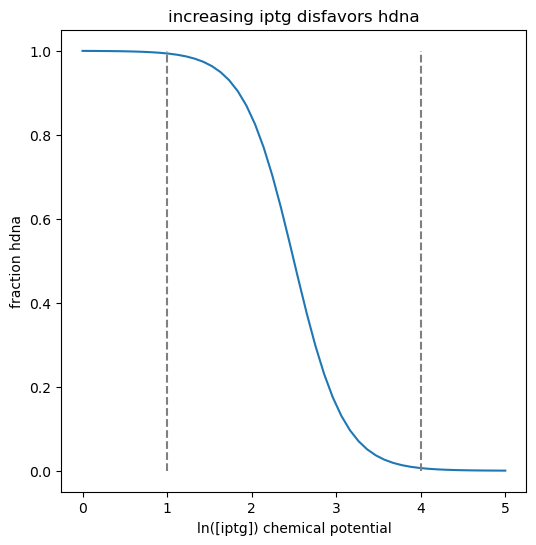

In [8]:
ens = eee.Ensemble()
ens.add_species("hdna",dG0=0,observable=True)
ens.add_species("h",dG0=5)
ens.add_species("l2e",dG0=5,mu_stoich={"iptg":2},observable=False)

df = ens.get_obs(mu_dict={"iptg":np.linspace(0,5)})
fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(df.iptg,df.fx_obs)
ax.set_xlabel("ln([iptg]) chemical potential")
ax.set_ylabel("fraction hdna")

ax.plot((1,1),(0,1),'--',color='gray')
ax.plot((4,4),(0,1),'--',color='gray')
ax.set_title("increasing iptg disfavors hdna")
None

### Load in $\Delta \Delta G$

Load in a spreadsheet with the energetics effects of mutations on all species in the ensemble. 

In [9]:
ddg_df = eee.io.load_ddg("../tests/data_for_tests/test_ddg/ddg.csv")
ddg_df

,site,mut,hdna,h,l2e
0,1,L1A,6.778,7.941,4.4385
1,1,L1C,8.147,11.205,7.6000
2,1,L1D,-0.234,1.073,3.2910
3,1,L1E,7.648,8.496,4.2360
4,1,L1F,1.447,4.023,-0.4560
...,...,...,...,...,...
75,4,G4S,15.472,35.673,20.0280
76,4,G4T,15.428,43.397,36.3300
77,4,G4V,24.131,39.590,45.7680
78,4,G4W,79.753,96.205,46.9070


### Simulate evolution

For this, we are going to use the `eee.evolve.simulate_tree` function. First, see what it's arguments are.


In [10]:
help(eee.evolve.simulate_tree)

Help on function simulate_tree in module eee.evolve.simulate_tree:

simulate_tree(ens, ddg_df, mu_dict, fitness_fcns, newick, select_on='fx_obs', fitness_kwargs={}, T=298.15, population_size=1000, mutation_rate=0.01, num_generations=100, burn_in_generations=10)



### Run evolutionary simulation

In this run, we select over 100 generations for the protein to be `on` for both $\mu _{iptg} = -4$ and $\mu _{iptg} = -1$. Our population size is 1000 and our mutation rate 0.01.

In [11]:
newick = '((A:0.1,B:0.5):0.5,(C:0.3,D:0.7):0.3);'

gc, tree = eee.evolve.simulate_tree(ens=ens,
                                 ddg_df=ddg_df,
                                 mu_dict={"iptg":[1,4]},
                                 fitness_fcns=[eee.evolve.ff_off,
                                               eee.evolve.ff_on],
                                 newick=newick,
                                 select_on="fx_obs",
                                 population_size=1000,
                                 mutation_rate=0.01,
                                 num_generations=1000,
                                 burn_in_generations=10)

  0%|          | 0/7 [00:00<?, ?it/s]

/Users/harmsm/work/programming/git-clones/eee/eee/evolve/wright_fisher.py:219: UserWarning: 

Did not accumulate requested number of mutations after 1000
generations. Accumulated 2 of 4 requested.
Try increasing num_generations and/or mutation_rate.


  warnings.warn(w)
/Users/harmsm/work/programming/git-clones/eee/eee/evolve/wright_fisher.py:219: UserWarning: 

Did not accumulate requested number of mutations after 1000
generations. Accumulated 2 of 3 requested.
Try increasing num_generations and/or mutation_rate.


  warnings.warn(w)
/Users/harmsm/work/programming/git-clones/eee/eee/evolve/wright_fisher.py:219: UserWarning: 

Did not accumulate requested number of mutations after 1000
generations. Accumulated 2 of 5 requested.
Try increasing num_generations and/or mutation_rate.


  warnings.warn(w)


In [12]:
alignment, tree = eee.evolve.extract_alignment(gc,tree,include_ancestors=True)
for a in alignment:
    print(a,alignment[a])

anc0 LVQG
anc1 LVQG
anc2 LVQG
A LVQG
B LVQG
C LVQG
D LVQG
